KANIA GALIH WIDOWATI

kania.widowati@binus.ac.id

#Get Data

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c GiveMeSomeCredit

In [ ]:
!unzip GiveMeSomeCredit.zip -d './data'

#Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load Dataset

In [ ]:
train_data = pd.read_csv('/content/data/cs-training.csv')
test_data = pd.read_csv('/content/data/cs-test.csv')
sample_submit= pd.read_csv('/content/data/sampleEntry.csv')

#Shape
print("Shape Of Data Train : ", train_data.shape)
print("Shape Of Data Test : ", test_data.shape)
print("Shape Of Data Sample Submit : ", sample_submit.shape)

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
sample_submit.head()

**Penjelasan Data**
- **SeriousDLqin2yrs**: Mengalami tunggakan jatuh tempo 90 hari atau lebih buruk
- **RevolvingUtilizationOfUnsecuredLines**	: Total saldo kartu kredit & jalur kredit (ex : pinjaman / jumlah batas kredit)
- **age** : usia peminjam
- **NumberOfTime30-59DaysPastDueNotWorse** : Berapa kali peminjam mengalami tunggakan/jatuh tempo selama 30-59 hari
- **DebtRatio**	: pembayaran utang, Biaya hidup / pendapatan kotor bulanan
- **MonthlyIncome** : pemasukan bulanan
- **NumberOfOpenCreditLinesAndLoans** : jumlah pinjaman terbuka dan jalur kredit
- **NumberOfTimes90DaysLate** : Berapa kali peminjam telah menunggak selama 90 hari atau lebih
- **NumberRealEstateLoansOrLines** : jumlah pinjaman real estate
- **NumberOfTime60-89DaysPastDueNotWorse** : Berapa kali peminjam telah menunggak 60-89 hari
- **NumberOfDependents** : Keluarga yang ditanggung, tidak termasuk dirinya sendiri

#Explore Data Analysis

In [ ]:
train_data.info()

In [ ]:
train_data.describe()

In [ ]:
test_data.info()

In [ ]:
test_data.describe()

Check Unique Value pada setiap kolom di data train dan data test

In [ ]:
train_data.nunique()

In [ ]:
test_data.nunique()

Check Missing Value

In [ ]:
train_data.isnull().sum()

In [ ]:
test_data.isnull().sum()

Pada data train & test
- Unnamed hanya berisikan angka urutan dari data sehingga tidak diperlukan
- Terdapat missing value pada MonthlysIncome dan NumberOfDependents pada data train dan data test
- NaN pada SeriousDlqin2yrs tidak perlu dihapus karena digunakan untuk melakukan predict

Imbalance Check

In [ ]:
train_data['SeriousDlqin2yrs'].value_counts() / train_data.shape[0]

Pada kolom ini terjadi imbalance data dikarenakan jumlah value 1 (memiliki tunggakan) dan 0 (tidak ada tunggakan) datanya tidak seimbang. Dari hasil diatas menunjukkan bahwa data 0 (tidak ada tunggakan) lebih banyak dibandingkan dengan orang yang memiliki tunggakan.Untuk mengatasi imbalance data bisa dilakukan dengan oversampling dan undersampling

In [ ]:
#Age Train data
sns.histplot(data=train_data, x='age', bins=30)
plt.title('Age Distribution Train')
plt.show()

In [ ]:
#Age Test Data
sns.histplot(data=test_data, x='age', bins=30)
plt.title('Age Distribution Test')
plt.show()

Dari data train dan data test, usia peminjam dominan di usia 40-60 tahun. dengan usia minimal 21 tahun dan usia maksimal 109 tahun

#Feature Engineering

In [ ]:
# train_data.drop(columns='Unnamed: 0', inplace=True)
plt.figure(figsize=(10, 10))
sns.heatmap(train_data.corr(), cmap='YlGnBu',annot=True)
plt.show()

Dari hasil heatmap diatas kolom berikut memiliki kolerasi yang tinggi
- NumberOfTime30-59DaysPastDueNotWorse
- NumberOfTimes90DaysLate
- NumberOfTime60-89DaysPastDueNotWorse

##Outlier Handling

In [ ]:
# Ganti nilai outlier dengan mean
def handle_outliers(df, feature_name, max_scale_from_std):
    f = df[feature_name]
    std = f.std()
    mean = f.mean()
    distance_from_mean = f - mean
    condition = np.abs(distance_from_mean) >= max_scale_from_std * std
    df.loc[condition, feature_name] = mean

    return df

In [ ]:

data_satu = train_data
# Menampilkan box plot sebelum penanganan outlier
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data_satu['NumberOfTime30-59DaysPastDueNotWorse'], vert=False)
plt.title('Sebelum Penanganan Outlier')

train_data = handle_outliers(data_satu, "NumberOfTime30-59DaysPastDueNotWorse", 3)

# Menampilkan box plot setelah penanganan outlier
plt.subplot(1, 2, 2)
plt.boxplot(train_data, vert=False)
plt.title('Sesudah Penanganan Outlier')

In [ ]:
data_dua = train_data
# Menampilkan box plot sebelum penanganan outlier
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data_dua['NumberOfTimes90DaysLate'], vert=False)
plt.title('Sebelum Penanganan Outlier')

train_data = handle_outliers(data_dua, "NumberOfTimes90DaysLate", 3)

# Menampilkan box plot setelah penanganan outlier
plt.subplot(1, 2, 2)
plt.boxplot(train_data, vert=False)
plt.title('Sesudah Penanganan Outlier')

In [ ]:
data_tiga = train_data
# Menampilkan box plot sebelum penanganan outlier
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data_tiga['NumberOfTime60-89DaysPastDueNotWorse'], vert=False)
plt.title('Sebelum Penanganan Outlier')

train_data = handle_outliers(data_dua, "NumberOfTime60-89DaysPastDueNotWorse", 3)

# Menampilkan box plot setelah penanganan outlier
plt.subplot(1, 2, 2)
plt.boxplot(train_data, vert=False)
plt.title('Sesudah Penanganan Outlier')

##Missing Value Handling

Pada data train dan test terdapat 2 kolom yang memiliki missing value yaitu
- NumberOfDependents
- MonthlyIncome

yang sudah dicheck pada bagian EDA diatas. Untuk mengisi missing value bisa menggunakan mean, median atau modus. namun perlu diperhatikan pengecekan persebaran data.

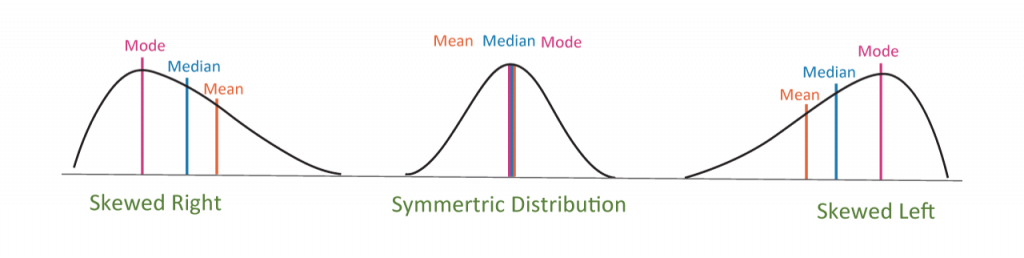

Missing Value Handling -> Data Train

In [ ]:
# Plot data train
fig, ax = plt.subplots(figsize=(10, 6), ncols=2)

# Plot distribusi NumberOfDependents
sns.distplot(train_data["NumberOfDependents"], ax=ax[0])
ax[0].set_title('Distribusi NumberOfDependents')
ax[0].set_xlabel('NumberOfDependents')
ax[0].set_ylabel('Frekuensi')

# Plot distribusi MonthlyIncome
sns.distplot(train_data["MonthlyIncome"], ax=ax[1])
ax[1].set_title('Distribusi MonthlyIncome')
ax[1].set_xlabel('MonthlyIncome')
ax[1].set_ylabel('Frekuensi')

plt.show()

Plot menunjukkan persebaran data yang miring ke kanan, maka kita bisa mengisi missing value dengan median dikarenakan data yang kita miliki merupakan data numeric.

In [ ]:
NOD_train = train_data['NumberOfDependents']
NOD_train_median = NOD_train.median()

MI_train = train_data['MonthlyIncome']
MI_train_median = MI_train.median()

In [ ]:
train_data['NumberOfDependents'].fillna(NOD_train_median, inplace=True)
train_data['MonthlyIncome'].fillna(MI_train_median, inplace=True)

In [ ]:
train_data.isnull().sum()

Missing Value Handling -> Data test

In [ ]:
# Plot data test
fig, ax = plt.subplots(figsize=(10, 6), ncols=2)

# Plot distribusi NumberOfDependents
sns.distplot(test_data["NumberOfDependents"], ax=ax[0])
ax[0].set_title('Distribusi NumberOfDependents')
ax[0].set_xlabel('NumberOfDependents')
ax[0].set_ylabel('Frekuensi')

# Plot distribusi MonthlyIncome
sns.distplot(test_data["MonthlyIncome"], ax=ax[1])
ax[1].set_title('Distribusi MonthlyIncome')
ax[1].set_xlabel('MonthlyIncome')
ax[1].set_ylabel('Frekuensi')

plt.show()

In [ ]:
NOD_test = test_data['NumberOfDependents']
NOD_test_median = NOD_test.median()

MI_test = test_data['MonthlyIncome']
MI_test_median = MI_test.median()

In [ ]:
test_data['NumberOfDependents'].fillna(NOD_test_median, inplace=True)
test_data['MonthlyIncome'].fillna(MI_test_median, inplace=True)

In [ ]:
test_data.isnull().sum()

In [ ]:
X = train_data.drop("SeriousDlqin2yrs", axis=1)
y = train_data["SeriousDlqin2yrs"]

In [ ]:
X.info()

In [ ]:
#Optimization using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

#Model

In [ ]:
#Split data -> 70 15 15
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [ ]:
X_train

##Random Forest

In [ ]:
#Model Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=5, random_state=0)
RF.fit(X_train, y_train)

In [ ]:
#Predict Random Forest
pred_RF = RF.predict(X_test)
pred_RF

In [ ]:
#Evaluation Random Forest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
cf_RF = classification_report(y_test, pred_RF, labels=[0, 1])
acc_RF = accuracy_score(y_test, pred_RF)
print(cf_RF)
print('Accuracy : ', acc_RF)

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm_RF = confusion_matrix(y_test, pred_RF)
print(cm_RF)

##Logistic Regression

In [ ]:
#Model
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression(random_state = 0)
Logreg.fit(X_train, y_train)

In [ ]:
#Predict Logistic Regression
pred_Logreg = Logreg.predict(X_test)
pred_Logreg

In [ ]:
#Evaluation
cf_LR = classification_report(y_test, pred_Logreg, labels=[0, 1])
acc_LR = accuracy_score(y_test, pred_Logreg)
print(cf_LR)
print('Accuracy : ', acc_LR)

In [ ]:
#Confusion matrix
cm_LR = confusion_matrix(y_test, pred_Logreg)
print(cm_LR)

##XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgbFit = xgb.fit(X_train, y_train)
xgbFit

In [ ]:
#predict
pred_xgb = xgb.predict(X_test)
pred_xgb

In [ ]:
# evaluasi
print(classification_report(xgb.predict(X_test), y_test))
print(accuracy_score(y_test, pred_xgb))

In [ ]:
#Confusion matrix
cm_xgb = confusion_matrix(y_test, pred_xgb)
print(cm_xgb)

Dari keempat model diatas yang memiliki accuracy terbaik adalah model Random Forest. Namun jika dilihat dari confussion matrix dari keempat model tersebut yang menurut saya paling baik adalah pada model XGBoost dimana menghasilkan TP dan TN yang lebih banyak dibandingkan dari kedua model lainnya. Namun False Positif dan False negative yang dihasilkan juga banyak. Namun jika dilihat dari precision, recall dan f1-scores, antara random forest dan XGBoost menurut saya masih lebih baik XGBoost. Sehingga model yang saya pilih adalah XGBoost

#AUC ROC

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred_xgb)
print(roc_auc)

In [ ]:
from sklearn.metrics import roc_curve

# Menghitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, pred_xgb)

# Menggambar ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()

#Submission

In [ ]:
X = test_data.drop(["SeriousDlqin2yrs"], axis=1)
y = xgbFit.predict_proba(X)[:, 1]
ids = X.index.values + 1
predicted = pd.DataFrame({'Id': ids, 'Probability': y})
predicted.to_csv("submission.csv", index=False)

In [ ]:
predicted

In [ ]:
predicted.shape